# This notebook is the processing of the data and modeling

In [1]:
# import the necessary python libaries to assist me in creating the model.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [135]:
ABB = pd.read_csv('D:\Cleaned_data.csv')
ABB.drop(['Unnamed: 0'],axis=1,inplace=True)
ABB[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month','calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000
mean,141.861152,6.125615,33.595560,1.201395,3.303440,111.592581
std,203.231672,18.370034,51.913258,1.525865,10.683647,129.916881
min,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,69.000000,2.000000,3.000000,0.150000,1.000000,0.000000
50%,104.000000,3.000000,11.000000,0.550000,1.000000,45.000000
75%,168.000000,4.000000,42.000000,1.780000,2.000000,225.000000
max,10000.000000,1250.000000,629.000000,19.750000,232.000000,365.000000


#### Above you will see me remove a column as it was created from reading in the clean data from the previous notebook. This column was not an original member of the working dataframe. You will also see that the statistics of the dataset is varied in range, however has consistent numbers except for a few outliers

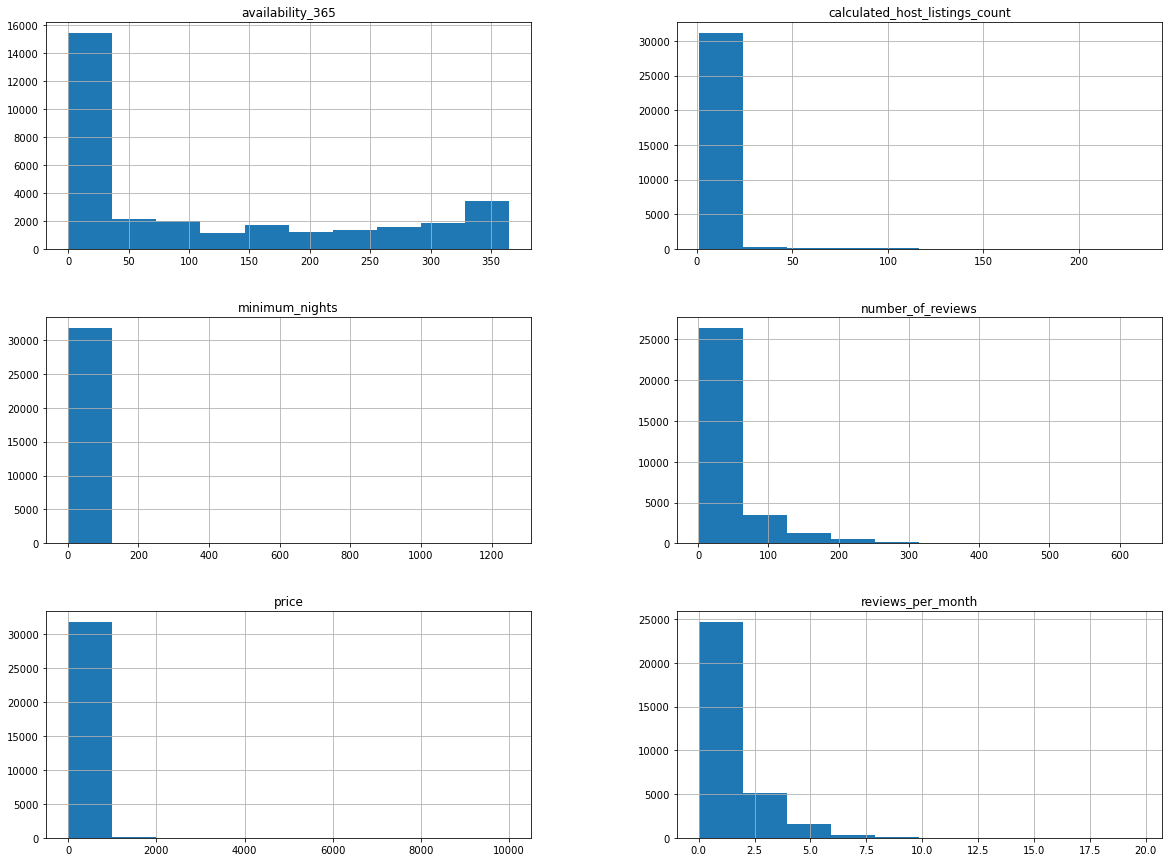

In [109]:
ABB[['price', 'minimum_nights', 'number_of_reviews', 
     'reviews_per_month','calculated_host_listings_count',
     'availability_365']].hist(figsize=(20,15))
plt.show()

#### We can see from here the histogram shows a large amount of rentals that are available between 1-50 days then slowly decrease downward till you reach the 365 days (1 year mark) rising again. 

#### Can also see that for minimum nights it does not exceed past 200 days but stops at around 150 days and for the shocking part is that the reviews per month and number of reviews match up significantly, but for the month you can see that the rentals are not getting much feed back from the customers. 

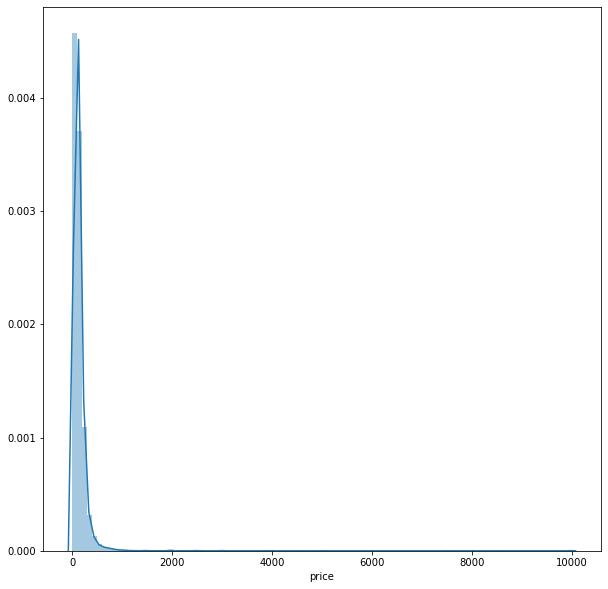

In [134]:
plt.figure(figsize=(10,10))
sns.distplot(ABB['price'],bins=100)
plt.show()

In [104]:
corr_matrix = ABB.corr()
corr_matrix["price"].sort_values(ascending=False)

price                1.000000
availability_365     0.106147
minimum_nights       0.043945
number_of_reviews   -0.005001
Name: price, dtype: float64

#### When comparing the price to all the other features you can see that not many of them are closely correlated except for the availability feature however this data will be used to predict the price for a minimum night for a rental 

In [93]:
ABB = ABB.fillna(0)
ABB.minimum_nights = ABB.minimum_nights.astype('int64')
ABB.price = ABB.price.astype('int64')
ABB.number_of_reviews = ABB.number_of_reviews.astype('int64')
ABB.availability_365 = ABB.availability_365.astype('int64')
ABB.head()

#### I have decided to fill all nan values with 0 as there were errors when trying to commit a datatype change from float32 to int64. Also this will be much easier for when I will have to upload the date into the model. 

In [95]:
ABB = ABB[['minimum_nights','number_of_reviews','availability_365','price']]
X=ABB.iloc[:,:1].values
y=ABB.iloc[:,-1].values

#### As this is a simple regression model I am reading in only on data point from the feature lists and that is minimum nights and for the dependent I am taking in prices as we are trying to pinpoint the necessary price for a minimum night. Anything more in the feature X this code will error out. 

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .40, random_state = 0)

In [123]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

LinearRegression()

#### I have started the data split into the train and test set for both the feature and the dependent variable. I have set the testing size to 40% as the dataset entity is ~20K. Once the data is split the work on the linear regression model starts with setting the regression intercept to true so that the data passes through the line for when it is plotted. 

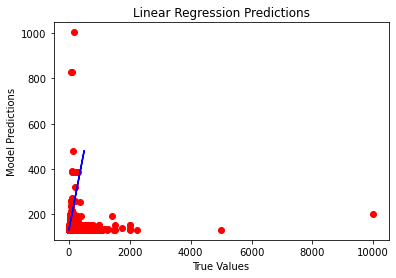

In [128]:
plt.scatter(y_test, y_pred, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Linear Regression Predictions')
plt.xlabel('True Values')
plt.ylabel('Model Predictions')
plt.show()

#### Above is the modeled data being predicted verse the true values for the dataset. We can see here that it is not a perfect prediction with the linear regression applied to it how you can see that it does capture the points of the predicted values. 

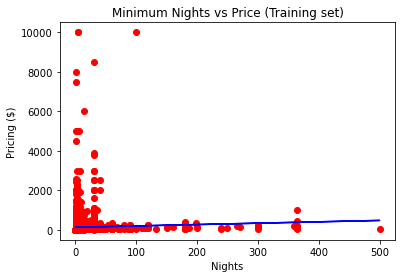

In [129]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Minimum Nights vs Price (Training set)')
plt.xlabel('Nights')
plt.ylabel('Pricing ($)')
plt.show()